/home/andy/Grass_Detection/Grass


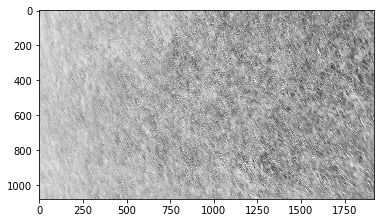

/home/andy/Grass_Detection/NotGrass


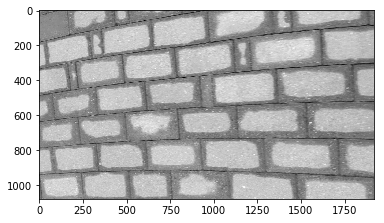

In [2]:
'''
Script to train and test a DCNN to visually differentiate between grass and 'not grass'
'''

import cv2 as cv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import os
import random
%matplotlib inline

data_dir = "/home/andy/Grass_Detection/"
categories = ['Grass','NotGrass']

for category in categories:
    img_path = os.path.join(data_dir,category) #path to still images
    print img_path
    for img in os.listdir(img_path):
        img_array = cv.imread(os.path.join(img_path,img),0)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break

In [3]:
print img_array.shape
img_height, img_width = img_array.shape[0], img_array.shape[1]
print 'image height: %i   imgage width: %i'%(img_height,img_width)

(1080, 1920)
image height: 1080   imgage width: 1920


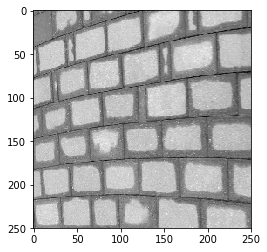

In [4]:
img_size = 250
new_array = cv.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')

In [5]:
'''
associate training set w/ random variable to differentiate between 'targets'
'''

train_set = []
def make_train_set():
    for category in categories:
        element_cnt = 0
        img_path = os.path.join(data_dir,category) #path to still images
        print img_path
        class_num = categories.index(category)
        print "%s: %i"%(category,class_num)
        for img in os.listdir(img_path):
            img_array = cv.imread(os.path.join(img_path,img),cv.IMREAD_GRAYSCALE)
            img_resize = cv.resize(img_array,(img_size,img_size))
            train_set.append([img_resize,class_num])
            element_cnt +=1
        print "Element Count: %i"%element_cnt
            
make_train_set()
print "Total length: " + str(len(train_set))

/home/andy/Grass_Detection/Grass
Grass: 0
Element Count: 1362
/home/andy/Grass_Detection/NotGrass
NotGrass: 1
Element Count: 150
Total length: 1512


In [6]:
random.shuffle(train_set) #shuffle "not grass" imgaes into "grass" images in training set

# assign features and labels to X and y arrays 
X = []
y = []
for features, labels in train_set:
    X.append(features)
    y.append(labels)
    
X = np.array(X).reshape(-1,img_size,img_size,1)

In [7]:
print X.shape

(1512, 250, 250, 1)


In [8]:
# normalize image values
X = X / 255.0

model = Sequential()
model.add(Conv2D(64,(3,3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer="adam",
              metrics=['accuracy'])
model.fit(X, y, batch_size=32, epochs = 5, validation_split=0.2)

Train on 1209 samples, validate on 303 samples
Epoch 1/5
1209/1209 [==============================] - 106s 88ms/step - loss: 1.4289 - acc: 0.9090 - val_loss: 2.1278 - val_acc: 0.8680
Epoch 2/5
1209/1209 [==============================] - 114s 94ms/step - loss: 1.4665 - acc: 0.9090 - val_loss: 2.1278 - val_acc: 0.8680
Epoch 3/5
1209/1209 [==============================] - 110s 91ms/step - loss: 1.4665 - acc: 0.9090 - val_loss: 2.1278 - val_acc: 0.8680
Epoch 4/5
1209/1209 [==============================] - 112s 93ms/step - loss: 1.4665 - acc: 0.9090 - val_loss: 2.1278 - val_acc: 0.8680
Epoch 5/5
1209/1209 [==============================] - 112s 93ms/step - loss: 1.4665 - acc: 0.9090 - val_loss: 2.1278 - val_acc: 0.8680
